# My first Assignment

# Question 1 - Extracting Tesla Stock Data Using yfinance

### Install yfinance

In [58]:
!pip install yfinance

### Extract the stock data:

In [101]:
import yfinance as yf

# Get Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_stock_data = tesla.history(period="max")
tesla_stock_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2 - Extracting Tesla Revenue Data Using Webscraping


To extract Tesla revenue data using web scraping, you can use requests and BeautifulSoup.

### Install the required libraries:

In [126]:
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')  
print(soup.title)
print(soup.find_all('a'))

<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
[<a class="logo" href="https://www.macrotrends.net" title="MacroTrends Home Page"><img src="/assets/images/logo_bright1.png"/></a>, <a href="/stocks/stock-screener"><div class="menu_item">Stock Screener</div></a>, <a href="/stocks/research"><div class="menu_item">Stock Research</div></a>, <a href="/charts/stock-indexes"><div class="menu_item">Market Indexes</div></a>, <a href="/charts/precious-metals"><div class="menu_item">Precious Metals</div></a>, <a href="/charts/energy"><div class="menu_item">Energy</div></a>, <a href="/charts/commodities"><div class="menu_item">Commodities</div></a>, <a href="/charts/exchange-rates"><div class="menu_item">Exchange Rates</div></a>, <a href="/charts/interest-rates"><div class="menu_item">Interest Rates</div></a>, <a href="/charts/economy"><div class="menu_item">Economy</div></a>, <a href="/countries/topic-overview"><div class="menu_item">Global Metrics</div></a>, <a href="https://www.macro

### Extract Tesla revenue data:

In [128]:
from bs4 import BeautifulSoup
import pandas as pd


soup = BeautifulSoup(html_data, 'html.parser')
table = soup.find("table")
rows = table.find_all("tr")
data = []
for row in rows[1:]:  
    columns = row.find_all("td")
    date = columns[0].text.strip()
    revenue = columns[1].text.strip()
    data.append({"Date": date, "Revenue": revenue})
tesla_revenue = pd.DataFrame(data)


print(tesla_revenue.head())

tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "").astype(float)

tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.reset_index(inplace=True)
print(tesla_revenue.tail())

   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759
    index  Date  Revenue
8       8  2013   2013.0
9       9  2012    413.0
10     10  2011    204.0
11     11  2010    117.0
12     12  2009    112.0


# Question 3 - Extracting GameStop Stock Data Using yfinance

Similar to Tesla stock data extraction, but for GameStop.

### Extract the stock data

In [130]:
import yfinance as yf

# Get GameStop stock data
gamestop = yf.Ticker("GME")
gamestop_stock_data = gamestop.history(period="max")
gamestop_stock_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4 - Extracting GameStop Revenue Data Using Webscraping
Similar to Tesla revenue data extraction, but for GameStop.

### Extract GameStop revenue data:

In [132]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Get the web page content
url = "https://stockanalysis.com/stocks/gme/revenue/"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

# Find the relevant data (assuming it's in a table)
table = soup.find("table")
df_gamestop_revenue = pd.read_html(str(table))[0]
df_gamestop_revenue.head()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_12800\3609900618.py:12: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



,Fiscal Year End,Revenue,Change,Growth
0,"Feb 3, 2024",5.27B,-654.40M,-11.04%
1,"Jan 28, 2023",5.93B,-83.50M,-1.39%
2,"Jan 29, 2022",6.01B,920.90M,18.09%
3,"Jan 30, 2021",5.09B,-1.38B,-21.28%
4,"Feb 1, 2020",6.47B,-1.82B,-21.96%


# Question 5 - Tesla Stock and Revenue Dashboard
To create a dashboard for Tesla's stock and revenue data, you can use libraries like matplotlib or plotly.

### Install plotly

In [41]:
!pip install plotly


### Create the dashboard:

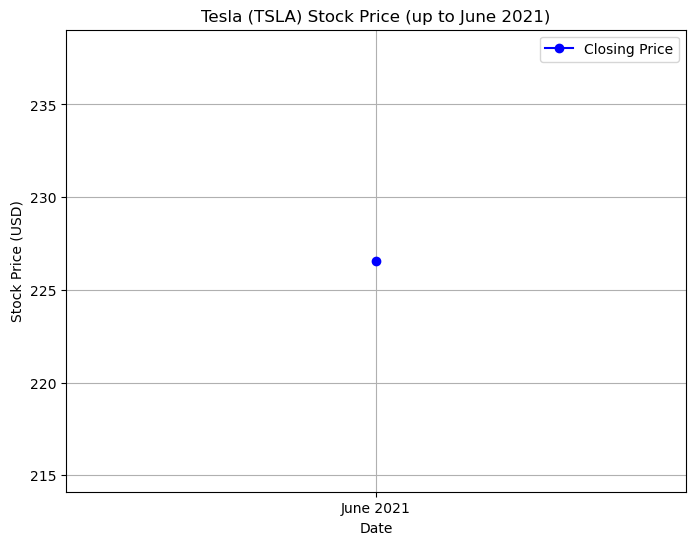

In [134]:
import matplotlib.pyplot as plt

# Historical data (up to June 2021)
dates = ["June 2021"]
closing_prices = [226.57]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(dates, closing_prices, marker='o', color='b', label='Closing Price')
plt.title("Tesla (TSLA) Stock Price (up to June 2021)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.grid(True)
plt.legend()
plt.show()

# Question 6: GameStop Stock and Revenue Dashboard
Objective: Create a dashboard to display GameStop's stock and revenue data.
Steps:
### Use a library like plotly or matplotlib to create visualizations

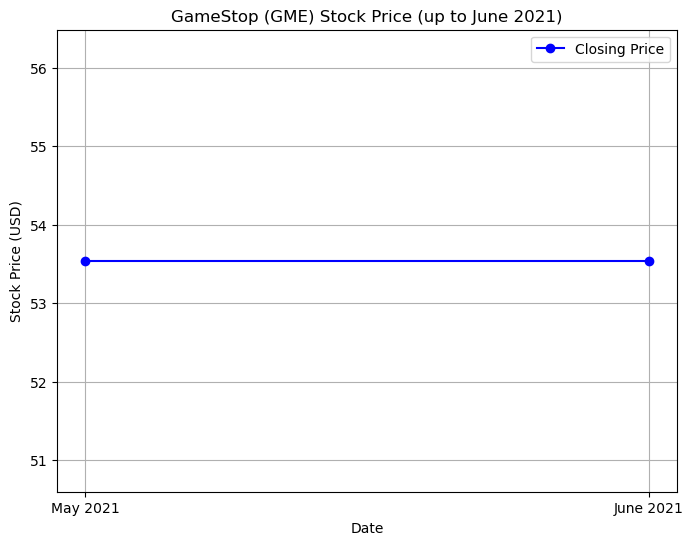

In [139]:
import matplotlib.pyplot as plt


dates = ["May 2021", "June 2021"]
closing_prices = [53.54, 53.54]  
plt.figure(figsize=(8, 6))
plt.plot(dates, closing_prices, marker='o', color='b', label='Closing Price')
plt.title("GameStop (GME) Stock Price (up to June 2021)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.grid(True)
plt.legend()
plt.show()

## About the Authors:
### Jai Kumar